# Support Vector Machine Classification Practice Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
pwd

u'/Users/ladonnapatterson/Downloads'

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset[:5]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Let's review the summary statistics and get an understanding of what the data looks like. 

In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


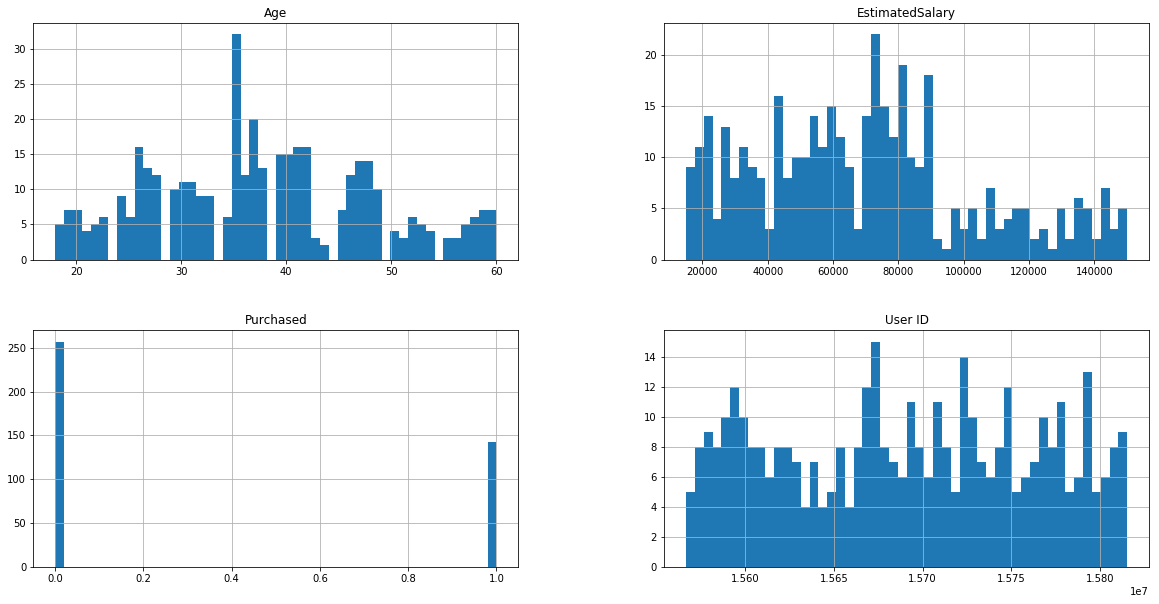

In [6]:
dataset.hist(bins=50, figsize=(20,10))
plt.show()

Split the dataset into x and y. Pre-processing may include: handling missing data, handling outliers, categorical encoding, one hot encoding, slicing, removing insignificant features, etc. You can also create a Pipeline to expedite the cleaning process.

In [7]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [8]:
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]])

In [9]:
y[:5]

array([0, 0, 0, 0, 0])

Split the dataset into the train and test sets. Can use 80/20 rule but be aware of potential bias. test_size=None also represents 0.25. random_state=0 for consistency among practice runs. 

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25, random_state=0)

Feature scaling to normalize the dataset due to different feature ranges. SVM is sensitive to outliers.

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [13]:
x_train[:5]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768],
       [-0.01254409, -0.5677824 ],
       [-0.60673761,  1.89663484],
       [ 1.37390747, -1.40858358]])

In [14]:
x_test[:5]

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566]])

Utilize SVC with a linear kernel since this practice dataset is linear. Alternatives for non-lineaar kernels include polynomial, rbf and sigmoid to name a few. Hyperparameter notes: C adjusts the margin with respect to the decision boundary. Small C means a wider margin. Lage C means a tighter margin. Gamma acts as a regularization hyperparameter. For overfitting reduce gamma and for underfitting increase gamma. 

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

Predict the test results.

In [16]:
y_pred = classifier.predict(x_test)

Let's look at the model's performance via a confusion matrix.

In [17]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[63,  5],
       [ 7, 25]])

Looks like we have 65 true negative, 5 false positives, 7 false negatives and 25 true positives. Let's take a look at the classification report.

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        68
           1       0.83      0.78      0.81        32

   micro avg       0.88      0.88      0.88       100
   macro avg       0.87      0.85      0.86       100
weighted avg       0.88      0.88      0.88       100



Precision is the positive predicted value TP/(TP+FP). Recall or sensitivity is the true positive rate (TP/P). F1 Score is the average of precision and recall. Support the number of samples that lie within the class.

Let's review the accuracy score.

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.88

Plot the confusion matrix based on the predicted results. 

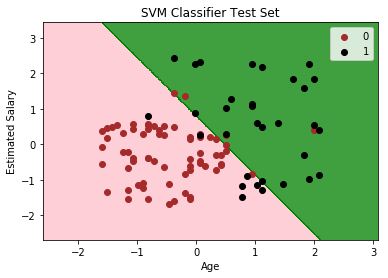

In [20]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('brown', 'black'))(i), label = j)
plt.title('SVM Classifier Test Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()